<a href="https://colab.research.google.com/github/ReinaldoDiasAbreu/markovchain/blob/main/Modelos_de_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelos de Markov

Quando estudamos inferência vimos que era possível concluir novas informações com base nas informações que já tínhamos, podendo assim inferir novas informações por meio de probabilidades.

Porém, dessa forma não é considera a idéia de tempo, que é utilizada por muitos problemas. Nós tinhamos as probabilidades em relação ao que observamos, não considerando a dimenção do tempo. 

Para representar o tempo, criamos uma variável que se altera, onde X representa o evento atual e X+1 o próximo evento e assim por diante, representando a idéia de tempo. Para utilizar e calcular as probabilidades futuras é possível usando o Modelo de Markov.


## Suposição de Markov

A suposição de Markov é uma suposição de que o estado atual depende apenas de um número fixo finito de estados anteriores. Assim é utilizado um número gerenciável de acontecimentos passados para determinar um evento futuro de forma aproximada o suficiente e que atenda as nossas necessidades.

## Cadeia de Markov

Uma Cadeia de Markov é a estrutura utilizada para representar as variáveis aleatórias utilizadas e que atendam a suposição de markov, isto é, as probabilidades de ocorer um evento dependem de eventos anteriores.

Para construir essa cadeia é necessário um modelo de transição que especifica as probailidades de um evento futuro em relação ao evento anterior, como ilustrado na figura abaixo:



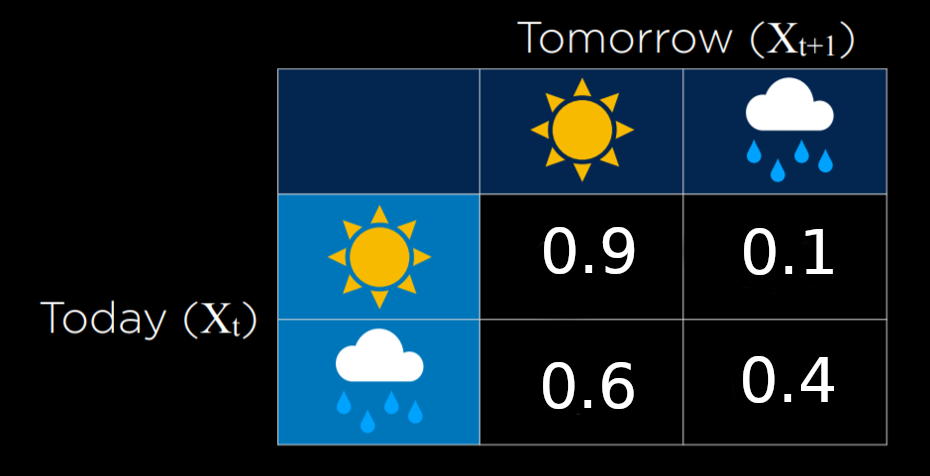

Na imagem acima, temos um modelo de transição, este modelo pode ser representado por meio de uma cadeia de markov, que internamente pode ser modelado em um grafo dirigido.

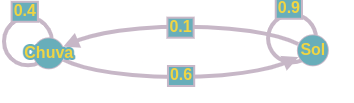

## Simulação do Exemplo

In [23]:
# Instala os módulos necessários
!pip install pomegranate

In [42]:
from pomegranate import *
import matplotlib.pyplot as plt

today = DiscreteDistribution({
    "sol": 0.5,
    "chuva": 0.5
})

tomorrow = ConditionalProbabilityTable([
    ["sol", "sol", 0.9],
    ["sol", "chuva", 0.1],
    ["chuva", "sol", 0.6],
    ["chuva", "chuva", 0.4]
], [today])

model = MarkovChain([today, tomorrow])

n = 100
amostras = model.sample(n)

In [43]:
print(amostras)

['chuva', 'chuva', 'sol', 'sol', 'sol', 'sol', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'chuva', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'chuva', 'sol', 'sol', 'chuva', 'sol', 'chuva', 'sol', 'sol', 'sol', 'sol', 'chuva', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'sol', 'chuva', 'chuva', 'sol', 'sol', 'sol', 'sol', 'sol']


Sol: 0.86 - Chuva: 0.14


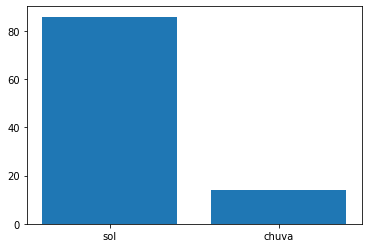

In [44]:
sol = amostras.count('sol')
chuva = n - sol
x = ['sol', 'chuva']
y = [sol, chuva]
print("Sol:", sol/n, "- Chuva:", chuva/n)
plt.bar(x, y)
plt.show()